In [3]:
from wrf_tools import WRFProcessor, ERA5DataDownloader
import os


In [4]:
run_period = { 'start_date' : "2025-02- 00", 'end_date' : "2024-01-02 12" }
#domain_center = { 'id': 'Mogadishu', 'lat': 2.05, 'lon': 45.32 }

domain_center = {
    'id': 'Ofunato',
    'lat': 39.07,
    'lon': 141.72
}

domain = { 'max_dom': 2, 'parent_grid_ratio' : (1,3,3), 
          'dx' : 6000, 'dy' : 6000, 
          'e_we_ini' : (50, 50, 50),
          'e_sn_ini' : (50, 50, 50) }

paths = {
    'wpsdir': "/Volumes/work/WRF_program/WRF_install/WPS/",
    'wrfdir': "/Volumes/work/WRF_program/WRF_install/WRF_mpi/",
    'geogdir': "/Volumes/work/WRF_program/WPS_GEOG",
    'renaldir': "/Volumes/work/WRF_program/era5/"+domain_center['id']+'/',
    'namelist_wps' : "namelist/namelist.wps",
    'namelist_input': "namelist/namelist.input"
}

base_dir = '/Volumes/work/share_data/2025/WRF'
run_dir = os.path.join(base_dir, 'Run_WRF', domain_center['id'])


download_dir = f"/Volumes/work/WRF_program/era5/{domain_center['id']}/"
downloader = ERA5DataDownloader(run_period, domain_center, domain, download_dir)

downloader.download_data()

wrf_processor = WRFProcessor(run_period, domain_center, domain, paths, run_dir)
wrf_processor.run_wrf()


2025-02-26 13:23:23,366 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-02-26 13:23:23,368 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


In [12]:
bounds = downloader.get_rectangle_bounds()

In [7]:
from nceigsd import NCEIGSDProcessor

In [15]:
area = [ bounds['south'], bounds['north'],bounds['west'],bounds['east'] ]
start_year, end_year = int(run_period['start_date'][:4]), int(run_period['end_date'][:4])

In [17]:
area

[-3.99, 1.41, 34.12, 39.52]

Found 36 stations. Starting download and processing...

--- Processing station: 63661099999 ---
Downloading: https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2024/63661099999.csv
100% [..............................................................................] 78609 / 78609
Download completed.

--- Processing station: 63673599999 ---

--- Processing station: 63684099999 ---
Downloading: https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2024/63684099999.csv
100% [..............................................................................] 12287 / 12287
Download completed.

--- Processing station: 63686099999 ---
Downloading: https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2024/63686099999.csv
100% [..............................................................................] 78764 / 78764
Download completed.

--- Processing station: 63687099999 ---
Downloading: https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2024/6368

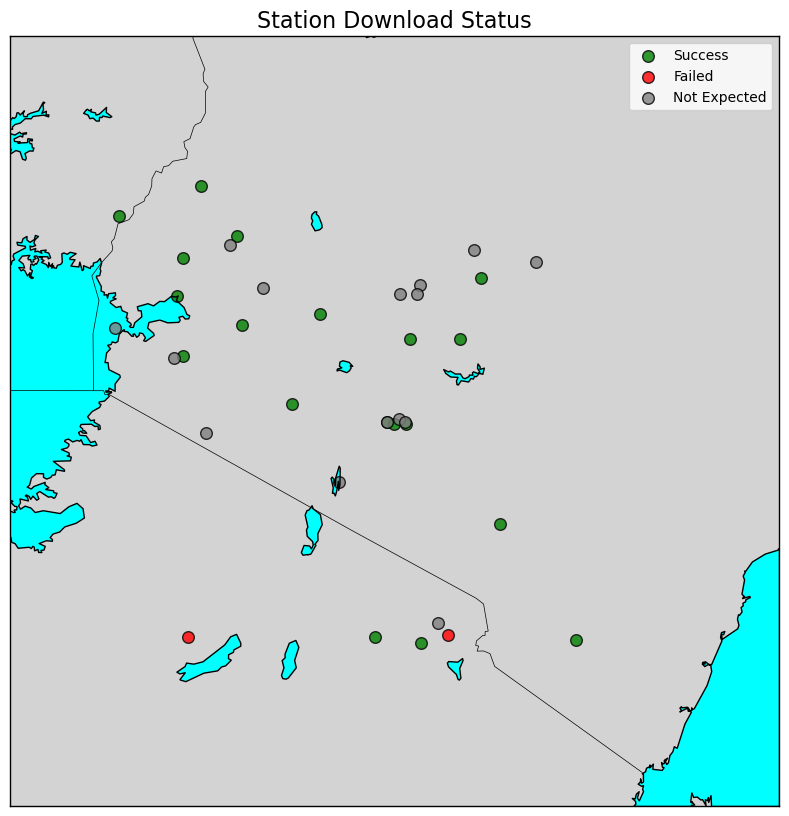

Saved heatmap to: output/test_output/summaries/availability_heatmap_63661099999.png
Saved heatmap to: output/test_output/summaries/availability_heatmap_63684099999.png
Saved heatmap to: output/test_output/summaries/availability_heatmap_63686099999.png
Saved heatmap to: output/test_output/summaries/availability_heatmap_63687099999.png
Saved heatmap to: output/test_output/summaries/availability_heatmap_63695099999.png
Saved heatmap to: output/test_output/summaries/availability_heatmap_63708099999.png
Saved heatmap to: output/test_output/summaries/availability_heatmap_63709099999.png
Saved heatmap to: output/test_output/summaries/availability_heatmap_63710099999.png
Saved heatmap to: output/test_output/summaries/availability_heatmap_63714099999.png
Saved heatmap to: output/test_output/summaries/availability_heatmap_63717099999.png
Saved heatmap to: output/test_output/summaries/availability_heatmap_63720099999.png
Saved heatmap to: output/test_output/summaries/availability_heatmap_63737099

In [16]:
processor = NCEIGSDProcessor(
    start_year=start_year,
    end_year=end_year,
    area=area,
    output_dir="output/test_output"
)

processor.run()                    # Run data download and processing
processor.plot_station_locations() # Plot station locations with categories
processor.plot_availability_heatmaps()  # Plot heatmaps (if seaborn is available)


Found 3 stations. Starting download and processing...

--- Processing station: 48840099999 ---
Downloading: https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2010/48840099999.csv
100% [..............................................................................] 81035 / 81035
Download completed.
Downloading: https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2011/48840099999.csv
100% [..............................................................................] 81481 / 81481
Download completed.
Downloading: https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2012/48840099999.csv
100% [..............................................................................] 81704 / 81704
Download completed.

--- Processing station: 48845099999 ---
Downloading: https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2010/48845099999.csv
100% [..............................................................................] 80673 / 80673
Download com

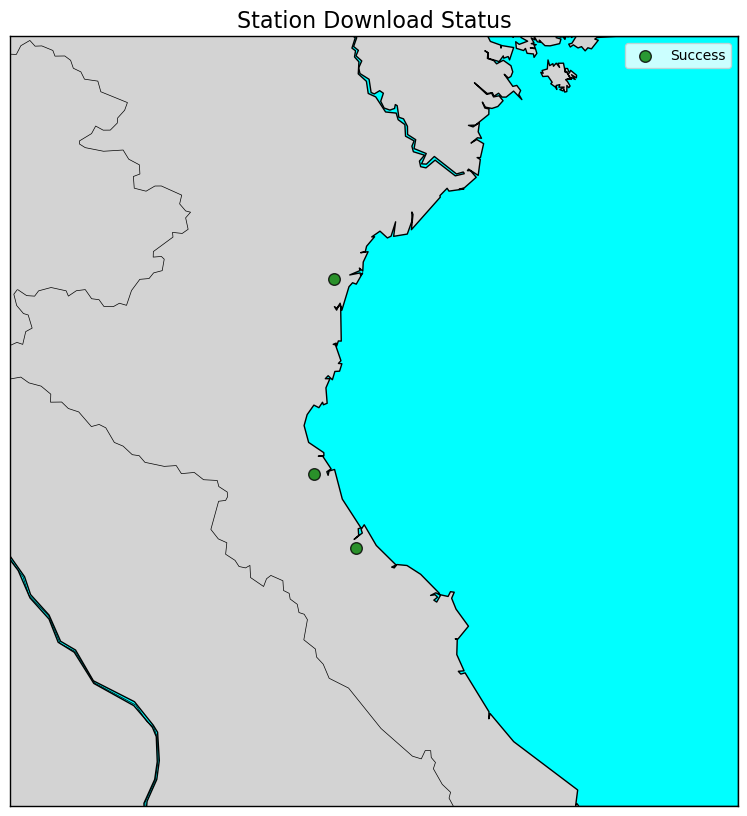

Saved heatmap to: output/test_output/summaries/availability_heatmap_48840099999.png
Saved heatmap to: output/test_output/summaries/availability_heatmap_48845099999.png
Saved heatmap to: output/test_output/summaries/availability_heatmap_48846099999.png


In [8]:
processor = NCEIGSDProcessor(
    start_year=2010,
    end_year=2012,
    area=[18, 20, 105, 107],
    output_dir="output/test_output"
)

processor.run()                    # Run data download and processing
processor.plot_station_locations() # Plot station locations with categories
processor.plot_availability_heatmaps()  # Plot heatmaps (if seaborn is available)

